# Crime Problem

## Hierarchical

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

In [2]:
data = pd.read_csv("D:/ExcelR/A7 clustering/crime_data.csv")

In [3]:
data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_norm = norm_func(data.iloc[:,1:])

In [7]:
from matplotlib import pyplot as plt

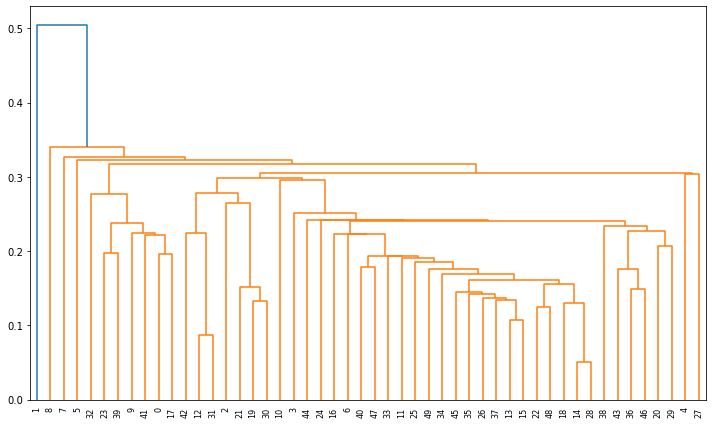

In [8]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'),ax=ax)
plt.show()

In [9]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')

In [10]:
y_hc = hc.fit_predict(df_norm)
Clusters = pd.DataFrame(y_hc)

In [11]:
df_norm['h_clusterid'] = Clusters

In [12]:
df_norm.sort_values('h_clusterid')

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
27,0.686747,0.708904,0.830508,1.000000,0
28,0.078313,0.041096,0.406780,0.056848,0
29,0.397590,0.390411,0.966102,0.297158,0
30,0.638554,0.821918,0.644068,0.640827,0
31,0.620482,0.715753,0.915254,0.485788,0
32,0.734940,1.000000,0.220339,0.227390,0
33,0.000000,0.000000,0.203390,0.000000,0
34,0.391566,0.256849,0.728814,0.364341,0
35,0.349398,0.363014,0.610169,0.328165,0


## K-means

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
dataset = pd.read_csv("D:/ExcelR/A7 clustering/crime_data.csv")

In [15]:
X = dataset.iloc[:,1:].values

C:\Users\Patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


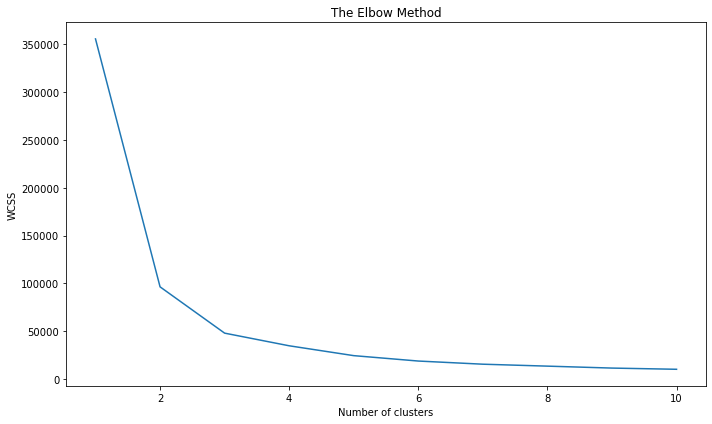

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [18]:
dataset['h_clusterid'] = y_kmeans

In [19]:
dataset.sort_values('h_clusterid')

,State,Murder,Assault,UrbanPop,Rape,h_clusterid
24,Missouri,9.0,178,70,28.2,0
46,Washington,4.0,145,73,26.2,0
45,Virginia,8.5,156,63,20.7,0
42,Texas,12.7,201,80,25.5,0
41,Tennessee,13.2,188,59,26.9,0
38,Rhode Island,3.4,174,87,8.3,0
36,Oregon,4.9,159,67,29.3,0
35,Oklahoma,6.6,151,68,20.0,0
29,New Jersey,7.4,159,89,18.8,0
20,Massachusetts,4.4,149,85,16.3,0


## DBSCAN

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("D:/ExcelR/A7 clustering/crime_data.csv")

In [22]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [24]:
dfcopy = df.drop(['State'],axis=1)

In [25]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [26]:
array = dfcopy.values

In [27]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [28]:
dbscan = DBSCAN(eps=1, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=4)

In [29]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [30]:
cl = pd.DataFrame(dbscan.labels_, columns=['cluster'])

In [31]:
pd.concat([df,cl], axis=1)

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


## KMedoids

In [33]:
#!pip install scikit-learn-extra

     -------------------------------------- 380.1/380.1 KB 2.6 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Patel\anaconda3\python.exe -m pip install --upgrade pip' command.


In [34]:
from sklearn_extra.cluster import KMedoids

In [35]:
kmedoids = KMedoids(n_clusters=4).fit(X)

In [36]:
kmedoids.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 0, 1,
       3, 1, 0, 2, 2, 1, 3, 0, 1, 1, 1, 3, 2, 2, 0, 2, 2, 1, 3, 1, 1, 0,
       3, 2, 0, 3, 3, 2], dtype=int64)

In [37]:
cl = pd.DataFrame(kmedoids.labels_, columns=['cluster_kmedoids'])
pd.concat([df,cl], axis=1)

,State,Murder,Assault,UrbanPop,Rape,cluster_kmedoids
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1
